<a href="https://colab.research.google.com/github/tomasmorozumi/inmersion_datos_alura/blob/main/Inmersion_Datos_Aula_2_by_Tomas_Morozumi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clase 2
---
1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información).
2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

---


##1. Importar datos

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
inmuebles = pd.read_csv('/content/drive/MyDrive/Alura/INMERSIÓN DATOS/inmuebles_bogota.csv')
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


---
##2. Preparación de datos

###2.1 Ajustamos headers

In [ ]:
columnas = {'Baños':'Banos','Área':'Area'}

inmuebles = inmuebles.rename(columns=columnas)
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


###2.2 Convertimos la columna valor a un tipo de dato adecuado

In [ ]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
6713,Apartamento,Apartamento en venta en Engativa,3,2,62,Engativa,Engativá,$ 285.000.000,$,285000000,285.0
3470,Apartamento,Apartamento en venta en Chapinero,1,2,51,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 450.000.000,$,450000000,450.0
2396,Apartamento,Apartamento en venta en Puente Aranda,2,2,77,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 462.000.000,$,462000000,462.0
8559,Apartamento,Apartamento en venta en Cedritos,2,2,64,Cedritos,Usaquén,$ 310.000.000,$,310000000,310.0
700,Apartamento,Apartamento en venta en Kennedy,3,1,49,Kennedy,Kennedy Central,$ 175.000.000,$,175000000,175.0


###2.3 Revisión para valores null

In [ ]:
inmuebles.isnull().sum()

Tipo              0
Descripcion       0
Habitaciones      0
Banos             0
Area              0
Barrio            0
UPZ              42
Valor             0
Moneda            0
Precio            0
Precio_Millon     0
dtype: int64

In [ ]:
inmuebles[inmuebles['UPZ'].isnull()].groupby('Barrio')['Barrio'].count()

Barrio
Pasadena     42
Name: Barrio, dtype: int64

In [ ]:
inmuebles[inmuebles['UPZ'].isnull()].sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
1522,Apartamento,Apartamento en venta en Pasadena,3,2,80,Pasadena,NaN,$ 480.000.000,$,480000000,480.0
9392,Casa,Casa en venta en Pasadena,6,4,220,Pasadena,NaN,$ 1.170.000.000,$,1170000000,1170.0
3859,Apartamento,Apartamento en venta en Pasadena,3,3,104,Pasadena,NaN,$ 600.000.000,$,600000000,600.0
1716,Apartamento,Apartamento en venta en Pasadena,2,3,109,Pasadena,NaN,$ 699.000.000,$,699000000,699.0
5191,Apartamento,Apartamento en venta en Pasadena,3,4,105,Pasadena,NaN,$ 350.000.000,$,350000000,350.0


In [ ]:
inmuebles[inmuebles['Barrio'] == 'Pasadena'].count()

Tipo             0
Descripcion      0
Habitaciones     0
Banos            0
Area             0
Barrio           0
UPZ              0
Valor            0
Moneda           0
Precio           0
Precio_Millon    0
dtype: int64

Algo sucede con este registro, ya que "Pasadena" no está registro como se lee en pantalla. Para este caso el caracter adicional es un espacio al final

In [ ]:
inmuebles.Barrio[inmuebles['Barrio'] == 'Pasadena '].count()

42

Se debe quitar este espacio y considerar hacerlo en todos los datos de la tabla.

De igual forma, se plantea la pregunta ¿Por qué todos los registros de Pasadena (42) tienen UPZ null?, ¿se debe a algún error o es así como funciona dicha localidad?

In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
inmuebles['Descripcion'] = inmuebles['Descripcion'].str.strip()
inmuebles['Tipo'] = inmuebles['Tipo'].str.strip()
inmuebles['Barrio'] = inmuebles['Barrio'].str.strip()
inmuebles['UPZ'] = inmuebles['UPZ'].str.strip()

inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
858,Apartamento,Apartamento en venta en Cedritos,3,2,95,Cedritos,Usaquén,$ 480.000.000,$,480000000,480.0
1823,Casa,Casa en venta en Usaquén,2,3,72,Usaquén,Usaquén,$ 320.000.000,$,320000000,320.0
9429,Casa,Casa en venta en Engativa,8,4,270,Engativa,Engativá,$ 600.000.000,$,600000000,600.0
5358,Apartamento,Apartamento en venta en Bosa,3,1,47,Bosa,Bosa Central,$ 124.000.000,$,124000000,124.0
7712,Apartamento,Apartamento en venta en El Castillo,3,5,200,El Castillo,Lucero,$ 1.900.000.000,$,1900000000,1900.0


In [ ]:
inmuebles.Barrio[inmuebles['Barrio'] == 'Pasadena'].count()

42

---
##3. Resolución del desafío
---

1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información).

In [ ]:
inmuebles.Tipo.value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

In [ ]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [ ]:
area_max_index = inmuebles['Area'].idxmax()
inmuebles.loc[area_max_index]

Tipo                                 Casa
Descripcion      Casa en venta en Modelia
Habitaciones                            4
Banos                                   3
Area                               166243
Barrio                            Modelia
UPZ                              Fontibón
Valor                       $ 850.000.000
Moneda                                  $
Precio                          850000000
Precio_Millon                       850.0
Name: 7073, dtype: object

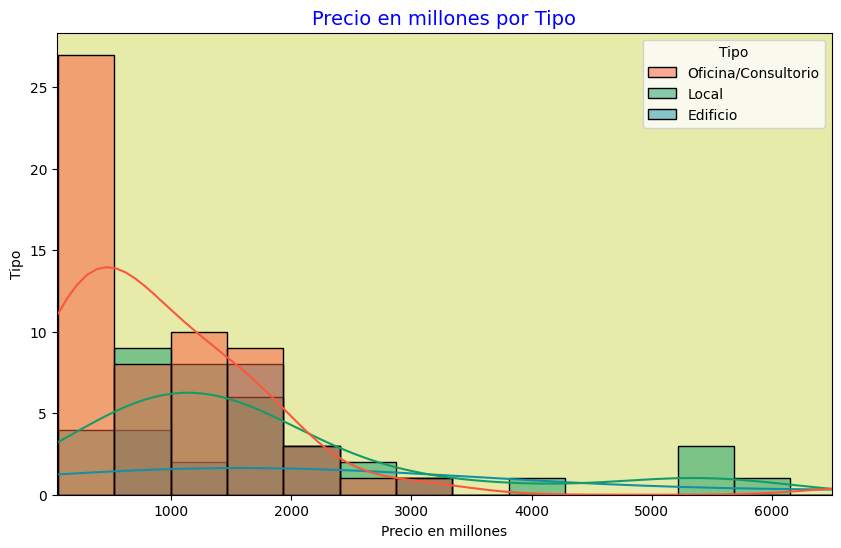

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
formato_titulo = {'fontsize':'14', 'color':'blue'}

grafica = sns.histplot(data=inmuebles[(inmuebles.Tipo == 'Oficina/Consultorio') |
                                      (inmuebles.Tipo == 'Local') |
                                      (inmuebles.Tipo == 'Edificio')],
                       x='Precio_Millon',
                       kde=True,
                       hue='Tipo',
                       palette=['#fb573b','#149c68','#158fa2'])

grafica.set_title("Precio en millones por Tipo", fontdict=formato_titulo)
grafica.set_xlabel("Precio en millones")
grafica.set_ylabel("Tipo")
plt.gca().set_facecolor('#e6eba9')

plt.xlim(50,6500)
plt.show()


**Conclusión:** El precio para estos 3 tipos de inmueble se encuentra mayormente distribuido en un rango de 0-3000 (millones de pesos colombianos). Lo que indica que podríamos encontrar una oficina/consultorio, un local o un edificio en este rango de precio sin mucho esfuerzo y por lo cual deberíamos tener en cuenta contar con presupuesto base mínimo que esté en este rango.

---
2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

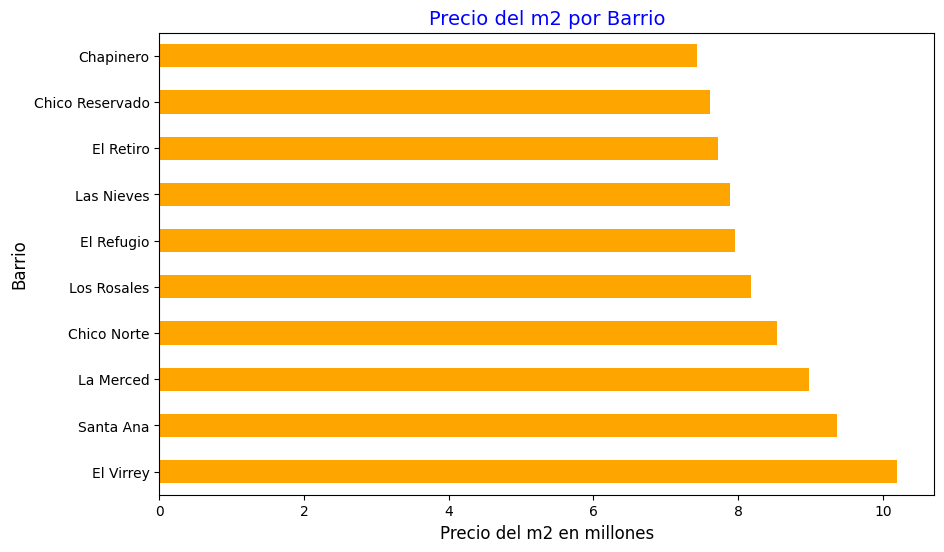

In [ ]:
inmuebles['Precio_m2'] = inmuebles['Precio_Millon']/inmuebles['Area']
precio_m2_por_barrio = inmuebles.groupby('Barrio')['Precio_m2'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
formato_titulo = {'fontsize':14, 'color':'blue'}
formato_etiqueta = {'fontsize':12, 'color':'black'}

grafica = precio_m2_por_barrio.head(10).plot(kind='barh', color='orange')
grafica.set_title('Precio del m2 por Barrio', fontdict=formato_titulo)
grafica.set_xlabel('Precio del m2 en millones', fontdict=formato_etiqueta)
grafica.set_ylabel('Barrio', fontdict=formato_etiqueta)

plt.show()